# Pyber Data Analysis

## This Jupyter Notebook will document the steps to create a bubble plot that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

## Moreover, this Jupyter Notebook will also document the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

## Data Analysis
* There are the most rides per city in the urban setting. Moreover, the average price of a ride in a city decreases in the urban setting as there are more rides and drivers per city in the urban setting. This must mean that the urban settings are over saturated with drivers. There is definitely a high demand for rides in the urban setting, however given the large supply of drivers and the competition amongst drivers for rides, the price of the fares decreases.
* Rural drivers actually probably do fine economically on a relative basis even given the low amount of rides. Given there are few drivers to compete against, the rural drivers are able to charge high fares. Thus, proportionally they are able to do much better on limited rides fare wise as compared to their urban counterparts.
* Suburban drivers also do better than their urban counterparts on a relative basis. They are able to secure a larger proportion of the fares than the amount of rides required proportionally as compared to their urban counterparts.

In [1]:
%matplotlib notebook

In [2]:
# import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [3]:
# create path to datasets and then read them into pandas dataframes
city_data_csv = "Resources/city_data.csv"
ride_data_csv = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_csv)
ride_data_df = pd.read_csv(ride_data_csv)

In [4]:
# first check to see if there are any outliers in the city data

# Use numpy to create quartiles
city_lower_quartile = np.percentile(city_data_df["driver_count"], 25, axis=0)
city_middle_quartile = np.percentile(city_data_df["driver_count"], 50, axis=0)
city_upper_quartile = np.percentile(city_data_df["driver_count"], 75, axis=0)
# Calculate the interquartile range
city_interquartile_range = city_upper_quartile - city_lower_quartile
# Find the upper boundary
city_upper_boundary = city_middle_quartile + (1.5 * city_interquartile_range)
# Find the lower boundary
city_lower_boundary = city_middle_quartile - (1.5 * city_interquartile_range)
# Check for any outliers in city data and note their position in the dataframe
city_counter = 0
city_outlier_arr = []
for element in city_data_df["driver_count"]:
    if element < city_lower_boundary:
        city_outlier_arr.append(city_counter)
    elif element > city_upper_boundary:
        city_outlier_arr.append(city_counter)
    city_counter += 1

# remove the outliers from the city data dataframe
city_data_df.drop(city_data_df.index[city_outlier_arr], inplace=True)

In [5]:
# similarly, check to see if there are any outliers in the ride data

# Use numpy to create quartiles
ride_lower_quartile = np.percentile(ride_data_df["fare"], 25, axis=0)
ride_middle_quartile = np.percentile(ride_data_df["fare"], 50, axis=0)
ride_upper_quartile = np.percentile(ride_data_df["fare"], 75, axis=0)
# Calculate the interquartile range
ride_interquartile_range = ride_upper_quartile - ride_lower_quartile
# Find the upper boundary
ride_upper_boundary = ride_middle_quartile + (1.5 * ride_interquartile_range)
# Find the lower boundary
ride_lower_boundary = ride_middle_quartile - (1.5 * ride_interquartile_range)
# Check for any outliers in ride data and note their position in the dataframe
ride_counter = 0
ride_outlier_arr = []
for element in ride_data_df["fare"]:
    if element < ride_lower_boundary:
        ride_outlier_arr.append(ride_counter)
    elif element > ride_upper_boundary:
        ride_outlier_arr.append(ride_counter)
    ride_counter += 1

# remove the outliers from the ride data dataframe
ride_data_df.drop(ride_data_df.index[ride_outlier_arr], inplace=True)

In [6]:
# create summary dataframe of ride data that shows total number of 
# rides per city and average fare per ride in the city

# get count of rides per city
count_rides = ride_data_df["city"].value_counts()
count_rides_df = pd.DataFrame({
    "Count of Rides": count_rides
})
# get average fare per city
average_fare = ride_data_df.groupby(["city"])
average_fare = average_fare.sum() / average_fare.count()
average_fare = average_fare.loc[:, ["fare"]]
average_fare = average_fare.rename(columns={"fare":"Average Ride Fare"})

# place results into a data frame as a summary of the fare data
ride_summary_df = count_rides_df.join(average_fare, how='outer')
ride_summary_df.reset_index(inplace=True)
ride_summary_df = ride_summary_df.rename(columns={"index":"city"})

# merge the ride summary dataframe into the city data dataframe
city_merge_df = pd.merge(city_data_df, ride_summary_df, on="city", how="outer")
# create column for total ride fare by city
city_merge_df["Total Ride Fare"] = city_merge_df["Count of Rides"] * city_merge_df["Average Ride Fare"]
city_merge_df.head()

,city,driver_count,type,Count of Rides,Average Ride Fare,Total Ride Fare
0,Richardfort,38.0,Urban,28,22.373214,626.45
1,Williamsstad,59.0,Urban,23,24.362174,560.33
2,Port Angela,67.0,Urban,19,23.836842,452.90
3,Rodneyfort,34.0,Urban,23,28.616957,658.19
4,West Robert,39.0,Urban,31,25.123871,778.84


<IPython.core.display.Javascript object>


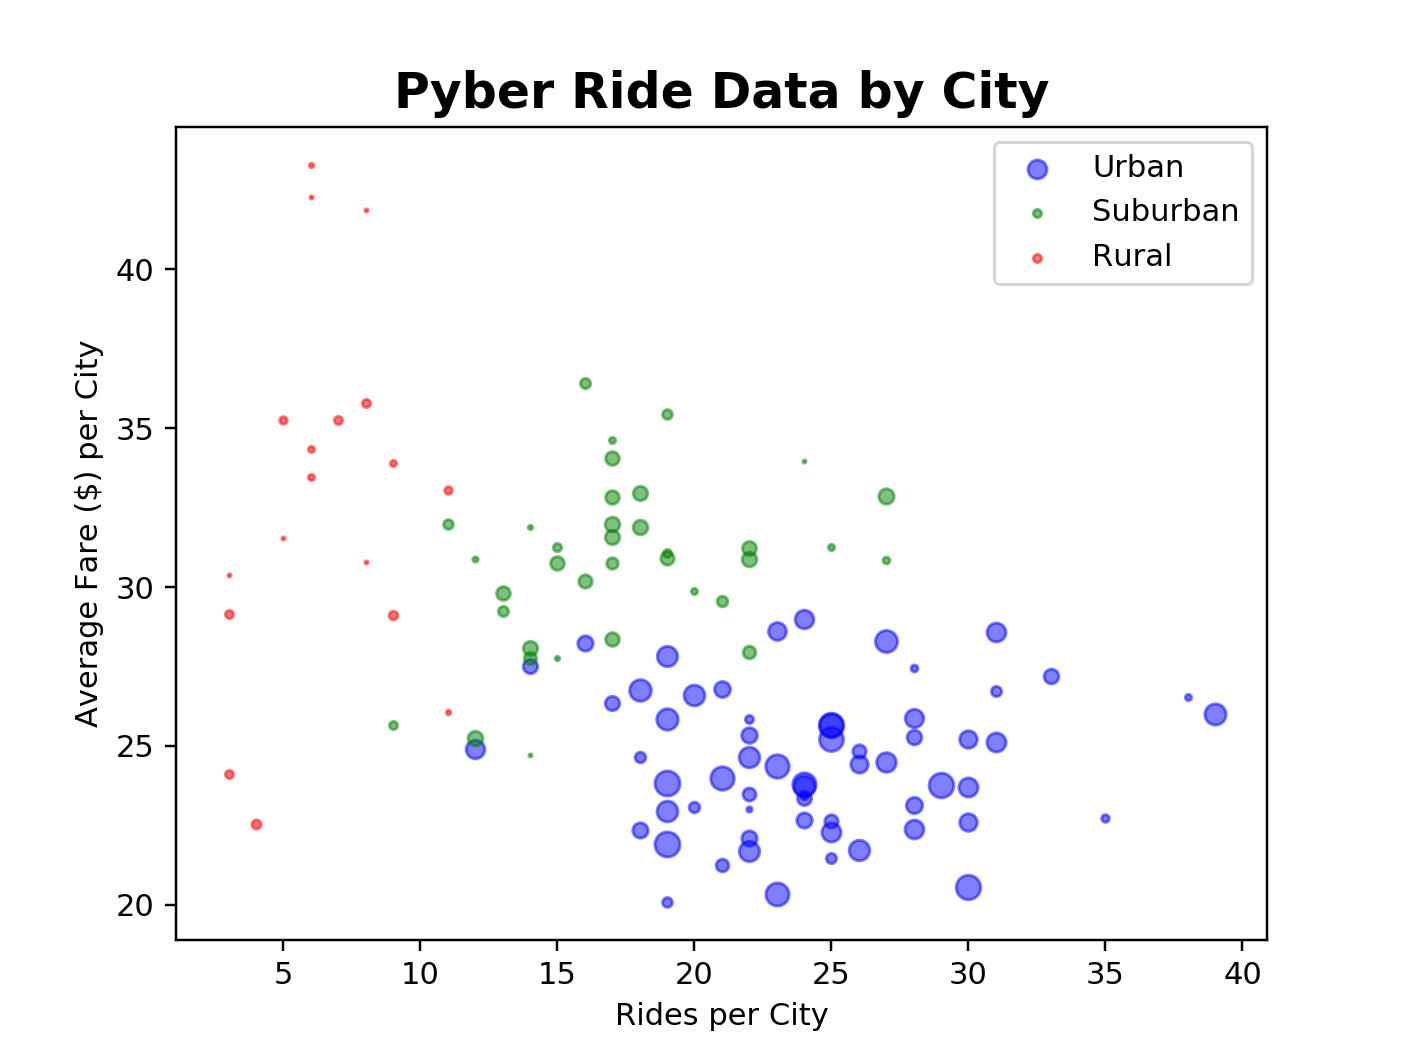

In [7]:
# create bubble chart comparing the metrics mentioned in the markdown header
# y-axis is average fare ($) per city
# x-axis is total number of rides per city
# size of the bubble is total number of drivers per city
# color of bubble differentiates city type (urban=blue, suburban=green, rural=red)

x_axis = city_merge_df["Count of Rides"]
y_axis = city_merge_df["Average Ride Fare"] 
bubble_size = city_merge_df["driver_count"] 
city_type = city_merge_df["type"] 

# plot the bubble chart
first_urban = True
first_suburban = True
first_rural = True

# set the color of the bubble based on the city type
for i in range(len(city_merge_df)):
    if city_type[i] == "Urban":
        if first_urban:
            plt.scatter(x_axis[i], y_axis[i], s=bubble_size[i], color="blue", 
                    label="Urban", alpha=0.5)
            first_urban = False
        else:
            plt.scatter(x_axis[i], y_axis[i], s=bubble_size[i], color="blue",
                       alpha=0.5) 
    elif city_type[i] == "Suburban":
        if first_suburban:
            plt.scatter(x_axis[i], y_axis[i], s=bubble_size[i], color="green",
                   label="Suburban", alpha=0.5) 
            first_suburban = False
        else:
            plt.scatter(x_axis[i], y_axis[i], s=bubble_size[i], color="green",
                       alpha=0.5)
    else:
        if first_rural:
            plt.scatter(x_axis[i], y_axis[i], s=bubble_size[i], color="red",
                   label="Rural", alpha=0.5)
            first_rural = False
        else:
            plt.scatter(x_axis[i], y_axis[i], s=bubble_size[i], color="red",
                       alpha=0.5)
        
# set x and y axis labels
plt.xlabel('Rides per City')
plt.ylabel('Average Fare ($) per City')

# give the graph a title and legend
plt.title('Pyber Ride Data by City', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

<IPython.core.display.Javascript object>


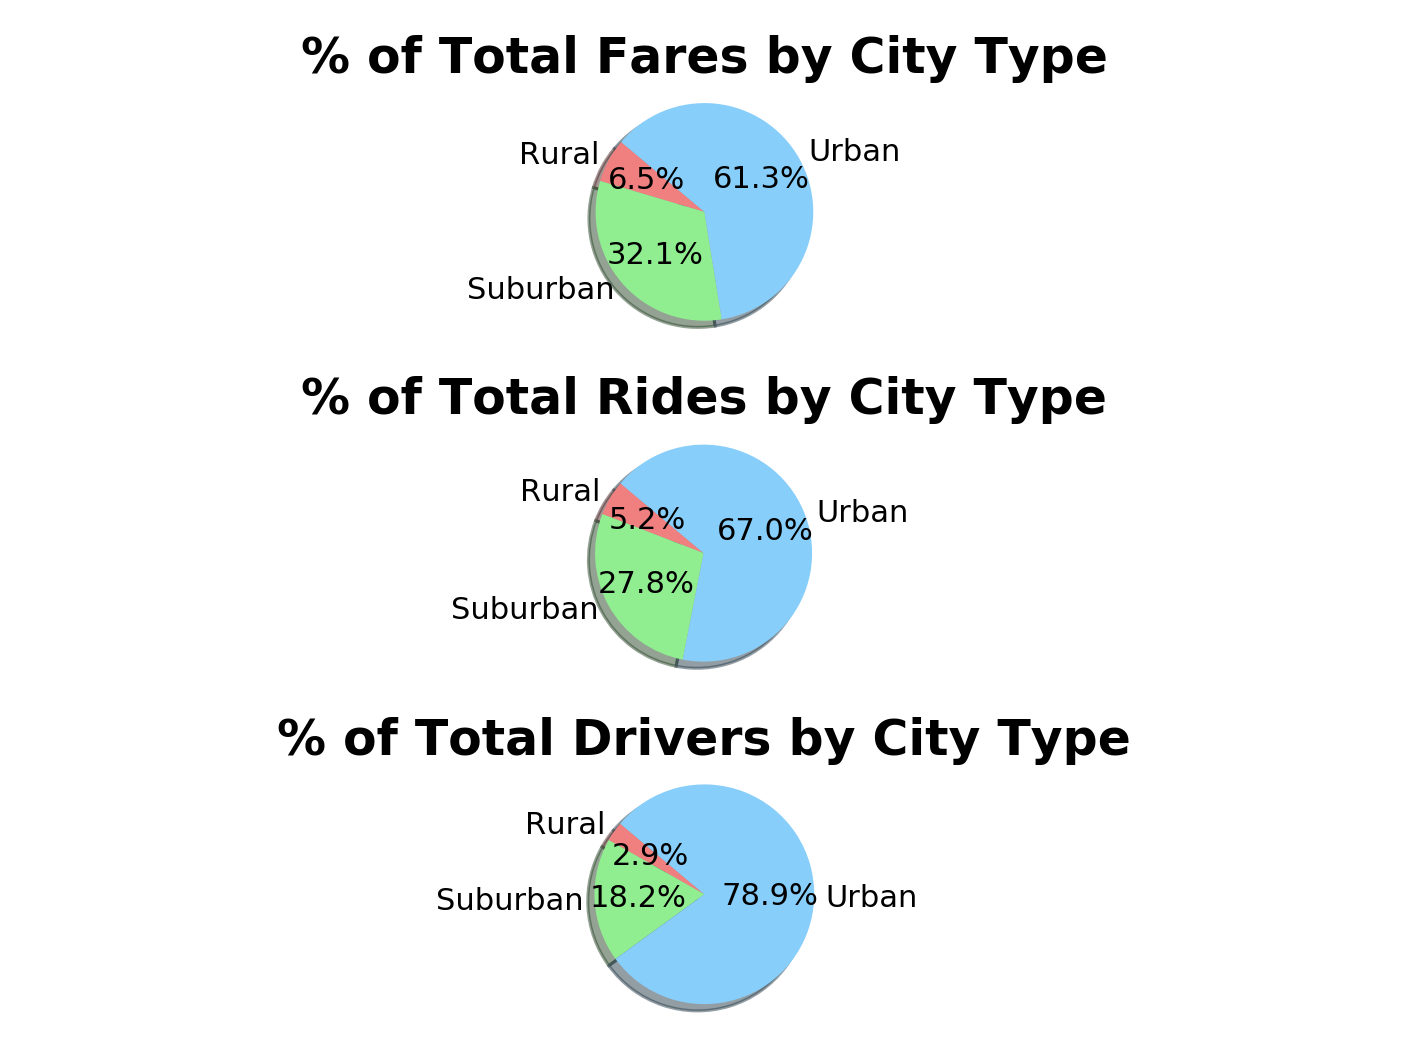

In [16]:
#fares_by_city_type = city_merge_df["type"].value_counts()
summary_by_city_type = city_merge_df.groupby("type").sum().loc[:, ["driver_count",
                                                                  "Count of Rides",
                                                                  "Total Ride Fare"]]

# build pie chart for % of Total Fares by City Type (ax1),
# % of Total Rides by City Type (ax2),
# % of Total Drivers by City Type (ax3)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False)

city_type_labels = ["Rural", "Suburban", "Urban"]
city_pie_colors = ["lightcoral", "lightgreen", "lightskyblue"]

# % of Total Fares by City Type (ax1)
fares_by_city_type = summary_by_city_type["Total Ride Fare"]
# % of Total Rides by City Type (ax2)
rides_by_city_type = summary_by_city_type["Count of Rides"]
# % of Total Drivers by City Type (ax3)
drivers_by_city_type = summary_by_city_type["driver_count"]

# Tell matplotlib to create the pie charts based upon the above data
ax1.pie(fares_by_city_type, labels=city_type_labels, colors=city_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ax2.pie(rides_by_city_type, labels=city_type_labels, colors=city_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ax3.pie(drivers_by_city_type, labels=city_type_labels, colors=city_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ax1.set_title("% of Total Fares by City Type", fontsize=16, fontweight="bold")

ax2.set_title("% of Total Rides by City Type", fontsize=16, fontweight="bold")

ax3.set_title("% of Total Drivers by City Type", fontsize=16, fontweight="bold")

# Create axes which are equal so we have a perfect circle
ax1.axis("equal")
ax2.axis("equal")
ax3.axis("equal")
fig.tight_layout()